In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.tsa.seasonal import STL

In [4]:
## Fundamental Data Analysis
funda_data = pd.read_csv('Fundamental_data.csv')
funda_data.columns

Index(['gvkey', 'permno', 'adate', 'qdate', 'public_date', 'pcf', 'dpr', 'npm',
       'gpm', 'roa', 'roe', 'capital_ratio', 'de_ratio', 'cash_ratio',
       'curr_ratio', 'inv_turn', 'pay_turn', 'sale_nwc', 'rd_sale',
       'staff_sale', 'accrual', 'PEG_trailing', 'TICKER'],
      dtype='object')

In [5]:
funda_data = funda_data.drop(columns=['public_date',"pcf",'staff_sale','PEG_trailing','gvkey','permno','adate'])
funda_data = funda_data.drop_duplicates()

In [6]:
funda_data

,qdate,dpr,npm,gpm,roa,roe,capital_ratio,de_ratio,cash_ratio,curr_ratio,inv_turn,pay_turn,sale_nwc,rd_sale,accrual,TICKER
0,12/31/2009,0.284,0.277,0.842,0.332,0.427,0.065,0.916,1.231,1.849,11.904,2.777,2.626,0.146,-0.063,MSFT
3,03/31/2010,0.266,0.290,0.846,0.321,0.425,0.081,0.912,1.334,1.932,12.411,2.762,2.368,0.144,-0.064,MSFT
6,06/30/2010,0.242,0.300,0.842,0.325,0.436,0.097,0.865,1.407,2.129,13.573,2.697,2.116,0.139,-0.065,MSFT
9,09/30/2010,0.220,0.313,0.848,0.353,0.460,0.108,0.882,1.505,2.134,12.983,2.849,2.227,0.135,-0.065,MSFT
12,12/31/2010,0.231,0.308,0.833,0.338,0.445,0.130,0.895,1.576,2.233,13.311,3.077,2.105,0.134,-0.055,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,09/30/2018,NaN,-0.102,0.280,0.021,-0.414,0.687,5.299,0.335,0.782,4.404,4.636,NaN,0.084,-0.112,TSLA
1153,12/31/2018,NaN,-0.045,0.276,0.056,-0.213,0.658,4.758,0.388,0.831,5.777,5.654,NaN,0.069,-0.105,TSLA
1156,03/31/2019,NaN,-0.043,0.270,0.063,-0.218,0.688,5.147,0.307,0.802,4.858,5.354,NaN,0.064,-0.099,TSLA
1159,06/30/2019,NaN,-0.026,0.261,0.082,-0.147,0.682,4.781,0.373,0.883,5.406,5.529,NaN,0.053,-0.119,TSLA


In there, we delete the unuseful columns named pulic_date, pcf, staff_sale, peg_trailing, gvkey, permno and drop the duplicates for each rows. We also delete the adate data out of the purpose to delete the unuseful information here. Finally, we gonna use the qdate to be the corresponding time to mark the ticker.

### Daily Indicators

In [7]:
for name in pd.unique(funda_data.TICKER).tolist():
    funda_stock = funda_data.loc[funda_data['TICKER'] == name,:]
    

In [8]:
funda_data.loc[funda_data['TICKER'] == 'TSLA',:]

,qdate,dpr,npm,gpm,roa,roe,capital_ratio,de_ratio,cash_ratio,curr_ratio,inv_turn,pay_turn,sale_nwc,rd_sale,accrual,TICKER
1051,06/30/2010,NaN,-0.855,0.248,-0.552,NaN,0.402,2.682,0.964,1.572,3.144,15.549,3.208,0.336,-0.060,TSLA
1054,09/30/2010,NaN,-1.284,0.312,-0.768,NaN,0.287,1.344,1.427,2.091,2.257,15.549,1.426,0.641,-0.049,TSLA
1057,12/31/2010,NaN,-1.322,0.354,-0.527,NaN,0.259,0.865,2.024,2.757,2.204,4.421,0.777,0.797,-0.103,TSLA
1060,03/31/2011,NaN,-1.199,0.393,-0.600,-0.484,0.315,1.157,1.631,2.359,2.134,3.362,1.268,0.834,-0.103,TSLA
1063,06/30/2011,NaN,-1.111,0.406,-0.558,-0.811,0.280,0.910,2.046,2.759,2.186,3.158,0.977,0.904,-0.117,TSLA
1066,09/30/2011,NaN,-1.115,0.398,-0.460,-0.951,0.345,1.103,1.996,2.630,2.427,2.761,1.004,0.922,-0.205,TSLA
1069,12/31/2011,NaN,-1.246,0.384,-0.427,-2.271,0.548,2.184,1.588,1.949,2.640,3.070,1.125,1.023,-0.255,TSLA
1072,03/31/2012,NaN,-1.593,0.385,-0.446,-1.142,0.489,1.764,1.737,2.169,2.182,2.052,0.881,1.274,-0.270,TSLA
1075,06/30/2012,NaN,-2.223,0.375,-0.458,-1.341,0.628,3.020,1.328,1.684,1.739,1.719,1.037,1.680,-0.253,TSLA
1078,09/30/2012,NaN,-2.651,0.238,-0.493,-2.112,0.777,6.424,0.844,1.213,1.346,2.451,2.501,1.821,-0.206,TSLA


### Weekly Indicators

##  MarcoEconomic Anslysis


In [9]:
import datetime as dt
from datetime import datetime
macro = pd.read_csv("macro_data_1.csv")
macro = macro.loc[macro.datadate < '2020-02-01']
macro.loc[:,'datadate'] =[datetime.strptime(str,"%Y-%m-%d") for str in macro.loc[:,'datadate']]
#macro.to_csv("macro_data.csv",index=0)




### Macroeconomic Indicators
- REAL_GDP: annual data type 
- REAL_GDP_PER_CAPITA: quarterly data type 
- TREASURY_YIELD: short time(3-month: risk free rate)/ long time (30 years) 
- FEDERAL_FUNDS_RATE: Board of Governors of the Federal Reserve System (US), Federal Funds Effective Rate, retrieved from FRED, Federal Reserve Bank of St. Louis
- CPI: monthly data 
- INFLATION: annual data 
- UNEMPLOYMENT: The unemployment rate represents the number of unemployed as a percentage of the labor force.  
- NONFARM_PAYROLL: the monthly US All Employees, a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.

In [10]:
def moving_normal(series,win):
    new = (series - series.rolling(window=win).min())/(series.rolling(window=win).max() - series.rolling(window=win).min())
   
    return new

In [11]:
macro_columns = ['datadate','gdp','gdpr1','gdpr2','cpi','bond20yr','bond30yr','fedfunds','cpir','wpir','unemp','employ']
macro_use = macro[macro_columns]
stock_list = ['AAPL','MSFT','GOOG','AMZN','NVDA','BRK-B','TSLA','META','JNJ','V']
macro_use.iloc[:,1:]
#macro_use.iloc[:,2:3].apply(lambda x: moving_normal(x, win=4),axis=0).head(40)

,gdp,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,unemp,employ
0,15.4151,15648.9910,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,9.8,129790.0
1,15.4151,15648.9910,15456.059,2.1728,4.40,4.55,0.13,1.6366,6.8318,9.8,129698.0
2,15.4151,15648.9910,15456.059,2.1735,4.55,4.72,0.09,1.6366,6.8318,9.9,129879.0
3,15.5573,15648.9910,15605.628,2.1740,4.36,4.53,0.20,1.6366,6.8318,9.9,130110.0
4,15.5573,15648.9910,15605.628,2.1729,4.05,4.22,0.19,1.6366,6.8318,9.6,130650.0
...,...,...,...,...,...,...,...,...,...,...,...
116,19112.6530,19036.0523,19130.932,2.5651,1.94,2.12,1.90,1.8129,-1.0440,3.5,151318.0
117,19202.3100,19036.0523,19215.691,2.5724,2.00,2.17,1.58,1.8129,-1.0440,3.6,151447.0
118,19202.3100,19036.0523,19215.691,2.5780,2.07,2.21,1.56,1.8129,-1.0440,3.6,151662.0
119,19202.3100,19036.0523,19215.691,2.5862,2.25,2.39,1.55,1.8129,-1.0440,3.6,151764.0


### Intrapolation

- **Seasonal decompose**:
 STL uses LOESS (locally estimated scatterplot smoothing) to extract smooths estimates of the three components:trend, seasonality, and noise.


In [12]:
macro_STL = {}
for col in macro_columns[1:]:

    macro_STL[col] = STL(macro_use.loc[:,col],period=12, robust=True).fit()
    if col == 'cpir':
        macro_STL[col] = STL(macro_use.loc[:,col],period=24, robust=True).fit()
    macro_use.loc[:,col+'_tr'] = macro_STL[col].trend+macro_STL[col].resid

macro_use

/tmp/ipykernel_690/560284882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_use.loc[:,col+'_tr'] = macro_STL[col].trend+macro_STL[col].resid
/tmp/ipykernel_690/560284882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_use.loc[:,col+'_tr'] = macro_STL[col].trend+macro_STL[col].resid
/tmp/ipykernel_690/560284882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,datadate,gdp,gdpr1,gdpr2,cpi,bond20yr,bond30yr,fedfunds,cpir,wpir,...,gdpr1_tr,gdpr2_tr,cpi_tr,bond20yr_tr,bond30yr_tr,fedfunds_tr,cpir_tr,wpir_tr,unemp_tr,employ_tr
0,2010-01-31 00:00:00,15.4151,15648.9910,15456.059,2.1749,4.38,4.51,0.12,1.6366,6.8318,...,15548.490863,15521.688342,2.155575,3.899734,4.083008,0.133288,2.289647,5.801307,9.925161,129613.529599
1,2010-02-28 00:00:00,15.4151,15648.9910,15456.059,2.1728,4.40,4.55,0.13,1.6366,6.8318,...,15567.021053,15544.406806,2.162386,3.929108,4.084886,0.139987,2.273377,5.988866,9.919558,129719.851903
2,2010-03-31 00:00:00,15.4151,15648.9910,15456.059,2.1735,4.55,4.72,0.09,1.6366,6.8318,...,15585.341180,15566.913694,2.165775,3.898644,4.069344,0.145498,2.258935,6.176877,9.902234,129866.885466
3,2010-04-30 00:00:00,15.5573,15648.9910,15605.628,2.1740,4.36,4.53,0.20,1.6366,6.8318,...,15605.579806,15591.721516,2.167202,3.899826,4.064629,0.167023,2.241631,6.364817,9.771730,130011.690713
4,2010-05-31 00:00:00,15.5573,15648.9910,15605.628,2.1729,4.05,4.22,0.19,1.6366,6.8318,...,15625.402841,15613.199513,2.171726,3.875822,4.209144,0.168973,2.221802,6.550885,9.651148,130158.042486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2019-09-30 00:00:00,19112.6530,19036.0523,19130.932,2.5651,1.94,2.12,1.90,1.8129,-1.0440,...,19127.308669,19128.035974,2.566397,2.184248,2.310609,1.981837,2.073234,-2.199971,3.610711,151307.291368
117,2019-10-31 00:00:00,19202.3100,19036.0523,19215.691,2.5724,2.00,2.17,1.58,1.8129,-1.0440,...,19164.211194,19175.150344,2.571553,2.143377,2.309190,1.717590,2.083342,-2.597882,3.591829,151470.705122
118,2019-11-30 00:00:00,19202.3100,19036.0523,19215.691,2.5780,2.07,2.21,1.56,1.8129,-1.0440,...,19199.302912,19216.176427,2.578129,2.024450,2.229872,2.025494,2.093017,-2.995318,3.578861,151688.516801
119,2019-12-31 00:00:00,19202.3100,19036.0523,19215.691,2.5862,2.25,2.39,1.55,1.8129,-1.0440,...,19235.500908,19257.821592,2.583849,2.067088,2.221781,1.508525,2.101977,-3.385031,3.517959,151826.839195


- Fit Seasonalities with Fourier/Wavelets

In [13]:
Date_df = pd.DataFrame(pd.date_range(start="2010-01-31",end="2020-01-31").to_pydatetime(),columns=['Date'])
Date_df['Date'] = [d.to_pydatetime() for d in Date_df.loc[:,'Date']]

macro_df = pd.merge(Date_df,macro_use, left_on='Date', right_on='datadate',how='outer')
macro_df.loc[macro_df.Date.isna(),'Date'] = macro_df.loc[macro_df.Date.isna(),'datadate']
macro_df = macro_df.sort_values(by='Date').drop('datadate',axis=1)
macro_df

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

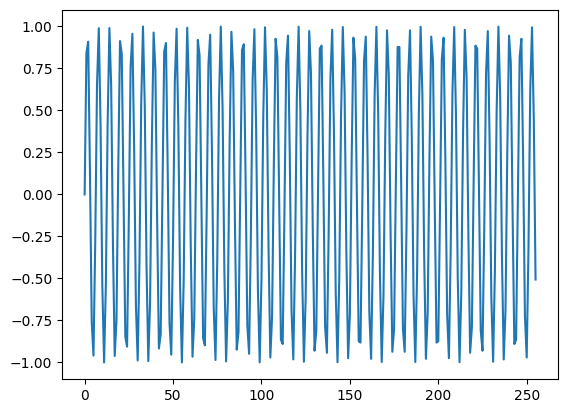

In [16]:
import matplotlib.pyplot as plt
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(np.fft.ifft(sp))
#plt.plot(np.sin(t))

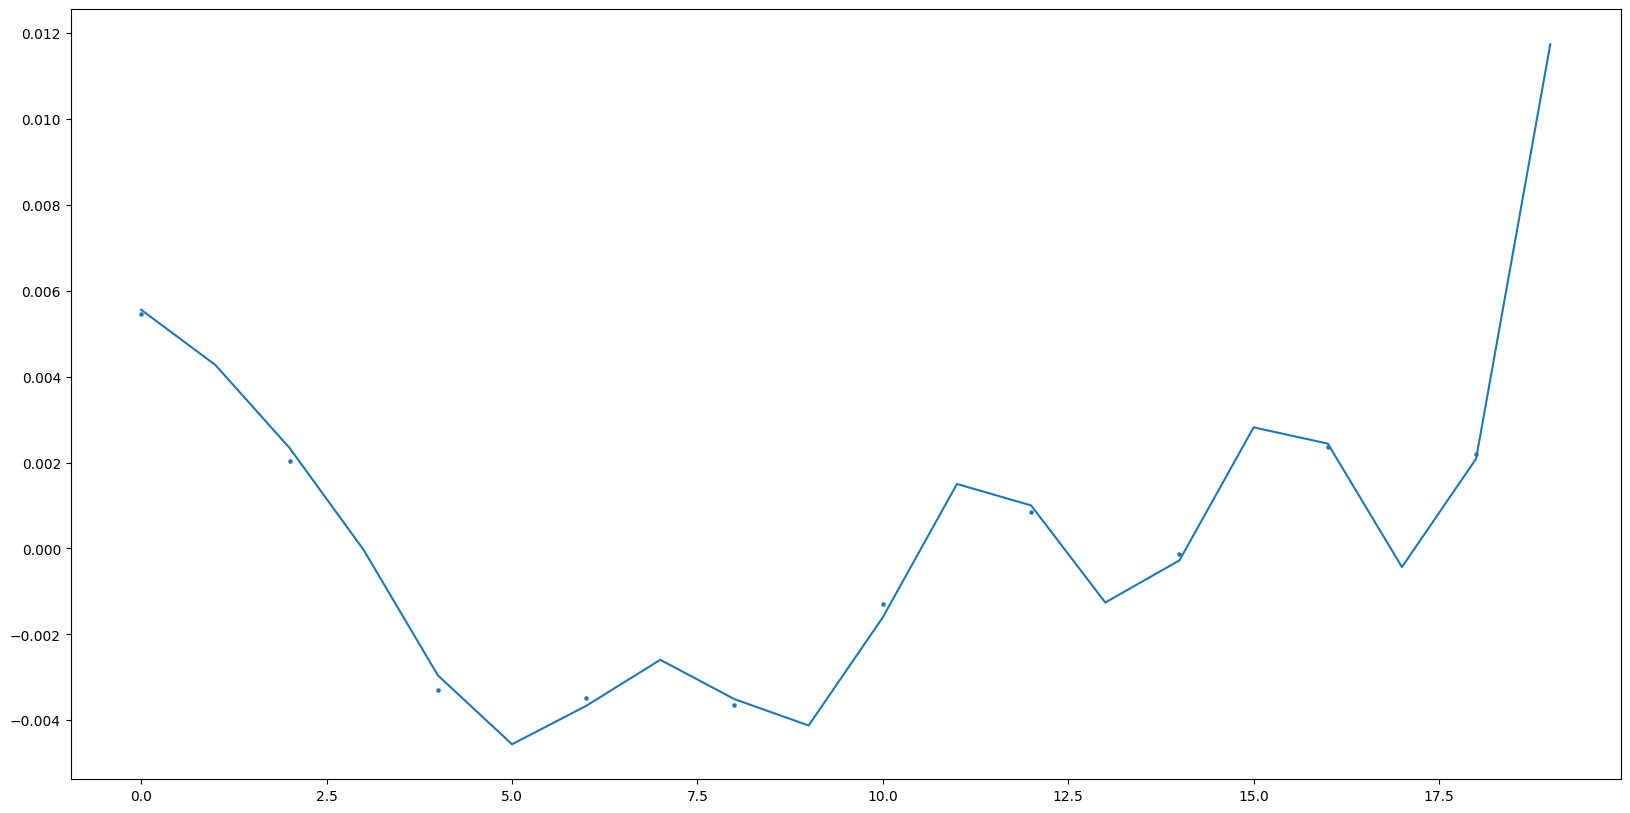

In [17]:
macro_ind = 'cpi'
gdpr1_seasonal = macro_STL[macro_ind].seasonal
sp = np.fft.rfft(gdpr1_seasonal)
freq = np.fft.rfftfreq(12)
plt.figure(figsize=(20,10))
plt.plot((np.fft.irfft(sp,n=240,norm='ortho')*np.sqrt(240)/121)[-20:])
plt.scatter(range(0,20,2), gdpr1_seasonal[1:][-10:],s=5)


In [18]:
macro_df.loc[:,'year'] =  [d.year for d in macro_df.loc[:,'Date']]
macro_df

NameError: name 'macro_df' is not defined

In [19]:
macro_fft = macro_df.loc[:,['Date','year']].copy()

for macro_ind in macro_columns[1:]:
    gdpr1_seasonal = macro_STL[macro_ind].seasonal
    fft_gpd_season = []
  
    sp = np.fft.rfft(gdpr1_seasonal[:60])
    #macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
    this_macro_df= macro_df.loc[(macro_df.year<2015)]
    fft_gpd_season = np.fft.irfft(sp,n=len(this_macro_df),norm='backward')*len(this_macro_df)/60
    macro_fft.loc[macro_fft.year<2015,macro_ind] = fft_gpd_season+this_macro_df.loc[:,macro_ind+'_tr']

    #
    sp = np.fft.rfft(gdpr1_seasonal[48:-13])
    #macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
    this_macro_df= macro_df.loc[(macro_df.Date>='2018-01-31')]
    fft_gpd_season = np.fft.irfft(sp,n=len(this_macro_df),norm='ortho')*np.sqrt(len(this_macro_df))/25
    macro_fft.loc[macro_fft.Date>='2018-01-31',macro_ind] = fft_gpd_season+this_macro_df.loc[:,macro_ind+'_tr']





    sp = np.fft.rfft(gdpr1_seasonal[-25:])
    #macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
    this_macro_df= macro_df.loc[(macro_df.Date>='2018-01-31')]
    fft_gpd_season = np.fft.irfft(sp,n=len(this_macro_df),norm='ortho')*np.sqrt(len(this_macro_df))/25
    macro_fft.loc[macro_fft.Date>='2018-01-31',macro_ind] = fft_gpd_season+this_macro_df.loc[:,macro_ind+'_tr']

plt.figure(figsize=(20,10))
plt.plot(macro_fft.loc[macro_fft.Date>='2018-01-31','Date'], fft_gpd_season)
plt.plot(macro_use.loc[macro_use.datadate>='2018-01-31','datadate'], gdpr1_seasonal[-25:])




NameError: name 'macro_df' is not defined

In [20]:
macro_fft = macro_df.loc[:,['Date','year']].copy()

for macro_ind in macro_columns[1:]:
    gdpr1_seasonal = macro_STL[macro_ind].seasonal
    fft_gpd_season = []
  
    sp = np.fft.rfft(gdpr1_seasonal[:])
    #macro_df.loc[:,macro_ind+'_tr'] = macro_df.loc[:,macro_ind+'_tr'].bfill()
    
   
    fft_gpd_season = np.fft.irfft(sp,n=len(macro_df),norm='backward')*len(macro_df)/121
    macro_fft.loc[macro_fft.year<2020,macro_ind] = fft_gpd_season+macro_df.loc[:,macro_ind+'_tr']

   
plt.figure(figsize=(20,10))
plt.plot(macro_fft.loc[:,'Date'], fft_gpd_season)
plt.plot(macro_use.loc[macro_use.datadate>='2010-01-01','datadate'], gdpr1_seasonal)



NameError: name 'macro_df' is not defined

In [21]:
plt.figure(figsize=(20,10))
plt.plot(macro_fft.loc[macro_fft.Date>'2010-01-01','Date'], macro_fft.loc[macro_fft.Date>'2010-01-01','cpi'])
plt.scatter(macro_use.loc[macro_use.datadate>'2010-01-01','datadate'], macro_use.loc[macro_use.datadate>'2010-01-01','cpi'],c='orange',s=5)

NameError: name 'macro_fft' is not defined

<Figure size 2000x1000 with 0 Axes>

In [22]:
plt.figure(figsize=(20,10))
plt.plot(macro_df.Date, macro_df.loc[:,macro_ind+'_fft'])
plt.scatter(macro_use.datadate, macro_df.loc[:,macro_ind],c='orange')



NameError: name 'macro_df' is not defined

<Figure size 2000x1000 with 0 Axes>

### Fill with 0


In [23]:
AAPL = pd.read_csv("../stock_price/Daily/AAPL.csv")
AAPL = pd.merge(AAPL[['Date']],macro_use, left_on='Date', right_on='datadate',how='outer')
AAPL.loc[AAPL.Date.isna(),'Date'] = AAPL.loc[AAPL.Date.isna(),'datadate']
AAPL = AAPL.sort_values(by='Date').drop('datadate',axis=1)
macro_list = ['gdp','gdpr1','gdpr2','cpi','bond20yr','bond30yr','fedfunds','cpir','wpir','unemp','employ']

AAPL.loc[:,macro_list] = AAPL.loc[:,macro_list].bfill()
AAPL.head(40)


TypeError: '<' not supported between instances of 'datetime.datetime' and 'str'

In [ ]:
import os
import sys

if not os.path.isdir('Macro'):
    os.mkdir('Macro')
if not os.path.isdir('Macro/Daily'):
    os.mkdir('Macro/Daily')
if not os.path.isdir('Macro/Weekly'):
    os.mkdir('Macro/Weekly')

if not os.path.isdir('Macro/Monthly'):
    os.mkdir('Macro/Monthly')


macro_bfill_daily = {}


for stock in stock_list:
    stock_df = pd.read_csv("../encode_price/Daily/"+stock+".csv")
    stock_df = pd.merge(stock_df[['Date','5. adjusted close']],macro_use, left_on='Date', right_on='datadate',how='outer')
    stock_df.loc[stock_df.Date.isna(),'Date'] = stock_df.loc[stock_df.Date.isna(),'datadate']
    stock_df = stock_df.sort_values(by='Date').drop('datadate',axis=1)
    stock_df.rename(columns={"5. adjusted close":"adjusted_close"},inplace=True)
    stock_df.loc[:,macro_list] = stock_df.loc[:,macro_list].bfill()
    macro_bfill_daily[stock] = stock_df
    stock_df.dropna(subset=['adjusted_close'],inplace=True)
    stock_df.to_csv("Macro/Daily/"+stock+".csv",index=0)




In [ ]:
macro_bfill_daily['AAPL'].head(40)

In [ ]:
macro_bfill_weekly = {}

for stock in stock_list:
    stock_df = pd.read_csv("../stock_price/Weekly/"+stock+".csv")
    stock_df = pd.merge(stock_df[['Date','adjusted_close']],macro_use, left_on='Date', right_on='datadate',how='outer')
    stock_df.loc[stock_df.Date.isna(),'Date'] = stock_df.loc[stock_df.Date.isna(),'datadate']
    stock_df = stock_df.sort_values(by='Date').drop('datadate',axis=1)
    stock_df.rename(columns={"5. adjusted close":"adjusted_close"},inplace=True)
    stock_df.loc[:,macro_list] = stock_df.loc[:,macro_list].bfill()
    stock_df.dropna(subset=['adjusted_close'],inplace=True)
    macro_bfill_weekly[stock] = stock_df
    stock_df.to_csv("Macro/Weekly/"+stock+".csv",index=0)




In [ ]:
macro_bfill_monthly = {}

for stock in stock_list:
    stock_df = pd.read_csv("../stock_price/Monthly/"+stock+".csv")
    stock_df = pd.merge(stock_df[['Date','adjusted_close']],macro_use, left_on='Date', right_on='datadate',how='outer')
    stock_df.loc[stock_df.Date.isna(),'Date'] = stock_df.loc[stock_df.Date.isna(),'datadate']
    stock_df = stock_df.sort_values(by='Date').drop('datadate',axis=1)
    stock_df.rename(columns={"5. adjusted close":"adjusted_close"},inplace=True)
    stock_df.loc[:,macro_list] = stock_df.loc[:,macro_list].bfill()
    macro_bfill_monthly[stock] = stock_df
    stock_df.dropna(subset=['adjusted_close'],inplace=True)
    stock_df.to_csv("Macro/Monthly/"+stock+".csv",index=0)



In [ ]:
macro_bfill_monthly['AAPL'].head(40)

### Technical Alpha Factor Generation
- SMA: simple moving average of closing price
- EMA: exponential moving average of closing price
- VWAP: the volume weighted average for intra
- MACD: the movign average convergence/divergence values
- STOCH: the stochastic oscillator values where here the close is in relation to the recent trading range
- RSI: the relative strength index (RSI) values, where calculates a ratio of the recent upward price movements to the absolute price movement
- MFI: the money flow index values - look for divergence with price to signal reversals. 
- SAR: returns the parabolic SAR values
- AD: The Accumulation/Distribution Line is similar to the On Balance Volume (OBV), which sums the volume times +1/-1 based on whether the close is higher than the previous close.The Accumulation/Distribution Line is interpreted by looking for a divergence in the direction of the indicator relative to price. If the Accumulation/Distribution Line is trending upward it indicates that the price may follow. Also, if the Accumulation/Distribution Line becomes flat while the price is still rising (or falling) then it signals an impending flattening of the price.

In [ ]:
from tech_indicators import *
import pandas as pd
if not os.path.isdir('Tech'):
    os.mkdir('Tech')
if not os.path.isdir('Tech/Daily'):
    os.mkdir('Tech/Daily')
if not os.path.isdir('Tech/Weekly'):
    os.mkdir('Tech/Weekly')

if not os.path.isdir('Tech/Monthly'):
    os.mkdir('Tech/Monthly')

stock_list = ['AAPL','MSFT','GOOG','AMZN','NVDA','BRK-B','TSLA','META','JNJ','V']

In [49]:
import tech_indicators as ti
AAPL = pd.read_csv("../stock_price/Daily/AAPL.csv")
df = stock_df.copy().sort_values(by="Date").reset_index(drop=True)
#df.reset_index(inplace=True)
sma = ti.calculate_sma(df, window=14)
ema = ti.calculate_ema(df, window=14)
k, d = ti.calculate_stoch(df)
rsi = ti.calculate_rsi(df)
mfi = ti.calculate_mfi(df)
sar = ti.calculate_sar(df)
ad = ti.calc_AD(df)

tech_Daily = pd.DataFrame({"Date":df.loc[:,"Date"],
              "SMA":sma,
              "EMA":ema,
              "STOCH_k":k,
              "STOCK_d":d,
              "RSI":rsi,
              "MFI":mfi,
              "SAR":sar,
              "AD":ad
              })

In [50]:
df

,Date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,SMA_14,EMA,rsi,mfi
0,2010-01-04,88.00,88.77,87.46,88.14,20.020748,5045000,0.0,1.0,NaN,88.140000,NaN,NaN
1,2010-01-05,87.30,87.53,86.00,87.13,19.791329,6458400,0.0,1.0,NaN,88.005333,NaN,NaN
2,2010-01-06,87.01,87.08,85.90,85.96,19.525567,4063500,0.0,1.0,NaN,87.732622,NaN,NaN
3,2010-01-07,85.97,87.00,85.55,86.76,19.707285,6960300,0.0,1.0,NaN,87.602939,NaN,NaN
4,2010-01-08,86.82,87.39,86.23,87.00,19.761800,2976800,0.0,1.0,NaN,87.522547,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,2020-01-27,200.00,203.33,199.10,201.69,197.320863,7194932,0.0,1.0,199.490000,200.234024,74.112654,80.031356
2533,2020-01-28,202.39,203.84,201.78,202.85,198.455735,7210988,0.0,1.0,200.501429,200.582821,76.636569,80.540753
2534,2020-01-29,204.30,205.92,202.51,204.86,200.422193,7038886,0.0,1.0,201.425714,201.153111,75.512618,80.810211
2535,2020-01-30,204.00,208.50,203.32,208.21,203.699623,8514602,0.0,1.0,202.494286,202.094030,77.319211,81.152525


In [58]:
for stock in stock_list:
    stock_df = pd.read_csv("../stock_price/Daily/"+stock+".csv")
    df = stock_df.copy().sort_values(by="Date").reset_index(drop=True)
    df.reset_index(inplace=True)
    sma = ti.calculate_sma(df, window=14)
    ema = ti.calculate_ema(df, window=14)
    k, d = ti.calculate_stoch(df)
    rsi = ti.calculate_rsi(df)
    mfi = ti.calculate_mfi(df)
    sar = ti.calculate_sar(df)
    ad = ti.calc_AD(df)

    tech_Daily = pd.DataFrame({"Date":df.loc[:,"Date"],
              "SMA":sma,
              "EMA":ema,
              "STOCH_k":k,
              "STOCK_d":d,
              "RSI":rsi,
              "MFI":mfi,
              "SAR":sar,
              "AD":ad
              })
    tech_Daily.to_csv("Tech/Daily/"+stock+".csv",index=0)
tech_Daily 

,Date,SMA,EMA,STOCH_k,STOCK_d,RSI,MFI,SAR,AD
0,2010-01-04,NaN,88.140000,NaN,NaN,NaN,NaN,NaN,1.925573e+05
1,2010-01-05,NaN,88.005333,NaN,NaN,NaN,NaN,NaN,-3.081459e+06
2,2010-01-06,NaN,87.732622,NaN,NaN,NaN,NaN,NaN,-2.705212e+06
3,2010-01-07,NaN,87.602939,NaN,NaN,NaN,NaN,NaN,1.574742e+06
4,2010-01-08,NaN,87.522547,NaN,NaN,NaN,NaN,NaN,6.829855e+06
...,...,...,...,...,...,...,...,...,...
2532,2020-01-27,199.490000,200.234024,20160.240130,20431.981364,74.112654,80.031356,2.687116e+22,3.528869e+10
2533,2020-01-28,200.501429,200.582821,20276.148617,20309.413576,76.636569,80.540753,2.740858e+22,3.582429e+10
2534,2020-01-29,201.425714,201.153111,20475.067575,20303.818774,75.512618,80.810211,2.795675e+22,3.636256e+10
2535,2020-01-30,202.494286,202.094030,20809.653937,20520.290043,77.319211,81.152525,2.851589e+22,3.690839e+10


In [51]:
def calculate_mfi(df,period=14):
    """
    Calculates the money flow index (MFI) of a DataFrame.

    Parameters:
    period (int): Number of periods to use for the MFI calculation.

    Returns:
    pandas.DataFrame: DataFrame containing the MFI values.
    """
    #df = get_daily_adjusted_prices(symbol)
    df["close"] = pd.to_numeric(df["close"])
    df["low"] = pd.to_numeric(df["low"])
    df["high"] = pd.to_numeric(df["high"])
    df["volume"] = pd.to_numeric(df["volume"])
    # Calculate typical price
    typical_price = (df['close'] + df['low'] + df['high']) / 3

    # Calculate raw money flow
    money_flow = typical_price * df['volume']

    # Get positive and negative money flow
    positive_flow = np.where(typical_price > typical_price.shift(1).fillna(method='bfill'), money_flow, 0)
    negative_flow = np.where(typical_price < typical_price.shift(1).fillna(method='bfill'), money_flow, 0)
   
    # Calculate the money flow ratio
    raw_mfr = positive_flow / negative_flow
    mfr = pd.Series(np.where(negative_flow == 0, 100, 100 - (100 / (1 + raw_mfr))))

    # Calculate the MFI
    mfi = mfr.rolling(window=period).mean()

    # Add MFI values to the DataFrame
    df['mfr'] = mfr
    df['mfi'] = mfi
    df['negative_flow'] = negative_flow
    df['positive_flow'] = positive_flow

    return df.loc[:,['Date','mfi','mfr','negative_flow','positive_flow']]

test = calculate_mfi(df)
test

/tmp/ipykernel_690/508595840.py:27: RuntimeWarning: divide by zero encountered in divide
  raw_mfr = positive_flow / negative_flow
/tmp/ipykernel_690/508595840.py:27: RuntimeWarning: invalid value encountered in divide
  raw_mfr = positive_flow / negative_flow


,Date,mfi,mfr,negative_flow,positive_flow
0,2010-01-04,NaN,100.0,0.000000e+00,0.000000e+00
1,2010-01-05,NaN,0.0,5.611488e+08,0.000000e+00
2,2010-01-06,NaN,0.0,3.507342e+08,0.000000e+00
3,2010-01-07,NaN,100.0,0.000000e+00,6.016251e+08
4,2010-01-08,NaN,100.0,0.000000e+00,2.586045e+08
...,...,...,...,...,...
2532,2020-01-27,78.571429,0.0,1.448867e+09,0.000000e+00
2533,2020-01-28,78.571429,100.0,0.000000e+00,1.462557e+09
2534,2020-01-29,78.571429,100.0,0.000000e+00,1.438959e+09
2535,2020-01-30,78.571429,100.0,0.000000e+00,1.759770e+09


In [56]:
for stock in stock_list:
    stock_df = pd.read_csv("../stock_price/Weekly/"+stock+".csv")
    df = stock_df.copy().sort_values(by="Date").reset_index(drop=True)
    sma = ti.calculate_sma(df, window=4)
    ema = ti.calculate_ema(df, window=4)
    k, d = ti.calculate_stoch(df,k_window=4)
    rsi = ti.calculate_rsi(df,period=4)
    mfi = ti.calculate_mfi(df,period=4)
    sar = ti.calculate_sar(df,lookback=4)
    ad = ti.calc_AD(df)

    tech_Weekly = pd.DataFrame({"Date":df.loc[:,"Date"],
              "SMA":sma,
              "EMA":ema,
              "STOCH_k":k,
              "STOCK_d":d,
              "RSI":rsi,
              "MFI":mfi,
              "SAR":sar,
              "AD":ad
              })
    
    tech_Weekly.to_csv("Tech/Weekly/"+stock+".csv",index=0)

In [57]:
for stock in stock_list:
    stock_df = pd.read_csv("../stock_price/Monthly/"+stock+".csv")
    df = stock_df.copy().sort_values(by="Date").reset_index(drop=True)
    sma = ti.calculate_sma(df, window=3)
    ema = ti.calculate_ema(df, window=3)
    k, d = ti.calculate_stoch(df,k_window=3)
    rsi = ti.calculate_rsi(df,period=3)
    mfi = ti.calculate_mfi(df,period=3)
    sar = ti.calculate_sar(df,lookback=3)
    ad = ti.calc_AD(df)

    tech_Monthly = pd.DataFrame({"Date":df.loc[:,"Date"],
              "SMA":sma,
              "EMA":ema,
              "STOCH_k":k,
              "STOCK_d":d,
              "RSI":rsi,
              "MFI":mfi,
              "SAR":sar,
              "AD":ad
              })
    
    tech_Monthly.to_csv("Tech/Monthly/"+stock+".csv",index=0)

### Merge Indicators

- Higham

In [ ]:
## higham
def P_s(a, wh):
    # helper function for higham, the second projection
 
    a = wh.dot(a).dot(wh)
    vals, vecs = np.linalg.eigh(a)
    vals[np.where(vals < 0)] = 0
    a = vecs.dot(np.diag(vals)).dot(vecs.T)

    wh_inv = np.diag(1 / np.diagonal(wh))

    a = wh_inv.dot(a).dot(wh_inv)
    return a


def P_u(a):
    # helper function for higham, the first projection
    np.fill_diagonal(a, 1)
    return a


def higham_psd(a, tol=None, max_iter=100, weights=None):
    # higham nearest psd
    if tol is None:
        tol = np.spacing(1) * len(a)
    if weights is None:
        weights = np.ones(len(a))
    w_h = np.diag(np.sqrt(weights))
    Y = np.copy(a)
    ds = np.zeros(np.shape(a))
    for i in range(0, max_iter):
        norm_Y_pre = fro_norm(Y)
        R = Y - ds
        X = P_s(R, w_h)

        ds = X - R
        Y = P_u(X)
        norm_Y = fro_norm(Y)

        if -1 * tol < norm_Y - norm_Y_pre < tol:
            break
    return pd.DataFrame(Y)

def fro_norm(a):
    return np.sum(np.square(a))


In [ ]:
def moving_normal(series,win):
    new = (series - series.rolling(window=win).mean())/series.rolling(window=win).std()
    return new

In [ ]:
AAPL = pd.read_csv("Merged/Daily/AAPL.csv")
AAPL = AAPL.loc[(AAPL.Date<'2019-10-01')&(AAPL.Date>"2010-01-21")]
#AAPL.iloc[:,1:] = AAPL.iloc[:,1:].apply(lambda x:moving_normal(series=x,win=10),axis=0)
corr = AAPL.drop("Date",axis=1).corr()
higham = higham_psd(AAPL.drop("Date",axis=1).corr())


In [ ]:
print(fro_norm(higham.values - corr.values))

1.6888769411126296e-28
